In [1]:
import os
import sys
import pickle
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'

# Set the working directory to the main folder
main_folder = '/home/sam/Desktop/beh_timescale'  # Adjust this path to your main folder
os.chdir(main_folder)

# Add the main folder to the system path
sys.path.insert(0, main_folder)

# Verify the working directory
print(os.getcwd())  # This should print '/home/sam/Desktop/beh_timescale'


/home/sam/Desktop/beh_timescale


# Data Analysis for LDS_sinWave_indiv

Data is initally in LDS_sinWave_indiv_v2 then compiled to LDS_sinWave_indiv

resegmented data using more rigid segmenting (smaller search area = 100) and wont store two of the same locations 
size of tau = 14400 

### Data Structure of `LDS_response_sinFunc_indiv.pickle`

This dataset organizes experimental trials conducted on individual worms over various periods, stored in `LDS_response_sinFunc_indiv.pickle`.

### Overview
Each key within the dataset represents a distinct experiment, labeled to reflect specific attributes such as date, conditions, and durations.

### Structure Details
- **Experiment Keys**: Unique identifiers for different experimental setups.
- **Entries Under Keys**: A list of `numpy` arrays, where each entry represents data from an individual worm.Each experiment contains data stored under the 'data' key, which is a list of numpy arrays, where each array represents trials from a single worm. The shape of these arrays shows the number of trials per worm and the number of timepoints per trial.
The 'stim' key contains a numpy array representing the UV stimulus data. It has the same number of timepoints as the trials and indicates when the stimulus is on.
- **Trials Per Worm**: Each worm's data might have a varying number of trials, depicted in rows within an array. Every row captures a trial with a uniform number of time points (e.g., 14400).
- **Time Points**: Uniformly distributed across all trials, showing the response measurements for the duration of a trial.Tau is saved at the top level of the dictionary (as an experiment)

In [2]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'

from tools.picklestructure import print_pickle_structure
print_pickle_structure('data/LDS_response_sinFunc_indiv.pickle')

Keys in the pickle file: dict_keys(['tau', '071323WT_30m_4.2mPeriod', '071323WT_30m_3.3mPeriod', '092123WT_30m_3.5mPeriod', '092123WT_30m_2.9mPeriod', '081823WT_30m_2mPeriod', '081823WT_30m_4mPeriod', '081823WT_30m_3mPeriod', '081123WT_30m_2mPeriod', '081123WT_30m_4mPeriod', '081123WT_30m_3mPeriod', '012724WT_30m_3.2mPeriod', '012724WT_30m_2.95mPeriod', '013024WT_30m_3.4mPeriod', '020224WT_30m_3.4mPeriod', '020224WT_30m_3.25mPeriod', '072123WT_30m_3.1mPeriod', '013024WT_30m_3.6mPeriod', '030824spp1_30m_3.1mPeriod', '030824spp1_30m_3.3mPeriod', '030824spp1_30m_3mPeriod', '031424spp1_30m_3.5mPeriod', '031424spp1_30m_2.8mPeriod', '031424spp1_30m_3mPeriod', '031424ppp1_30m_3.4mPeriod', '031424ppp1_30m_2.7mPeriod', '031424ppp1_30m_3mPeriod', '030824ppp1_30m_2.9mPeriod', '030824ppp1_30m_3.2mPeriod', '031124ppp1_30m_3.1mPeriod', '031124ppp1_30m_3.3mPeriod', '040524ppp1_30m_3.5mPeriod', '040524ppp1_30m_2.8mPeriod', '040524ppp1_30m_3mPeriod', '040524spp1_30m_3.4mPeriod', '040524spp1_30m_2.7mPer

## Worm Activity by Trial Response Visualization

**Overview:** This grid of plots shows the activity data from various trials involving worms, plotted over time. Each subplot corresponds to a single trial of an individual worm.

**Plot Components:**
- **X-Axis:** Time in minutes, centered at zero when the stimulus starts.
- **Y-Axis:** Quantitative measure of worm activity.
- **Blue Line:** Represents the worm's activity response throughout the trial.
- **Red Line:** Indicates the application of the stimulus, overlaid on the activity for reference.

**Purpose:** These visualizations help analyze the temporal dynamics of worm responses to stimuli, facilitating comparisons across trials and conditions to understand behavioral patterns.


This plots an individual experiment and the trials(x-axis) by worm (y-axis)

/home/sam/Desktop/beh_timescale/analysis_functions/results_sin_indiv.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


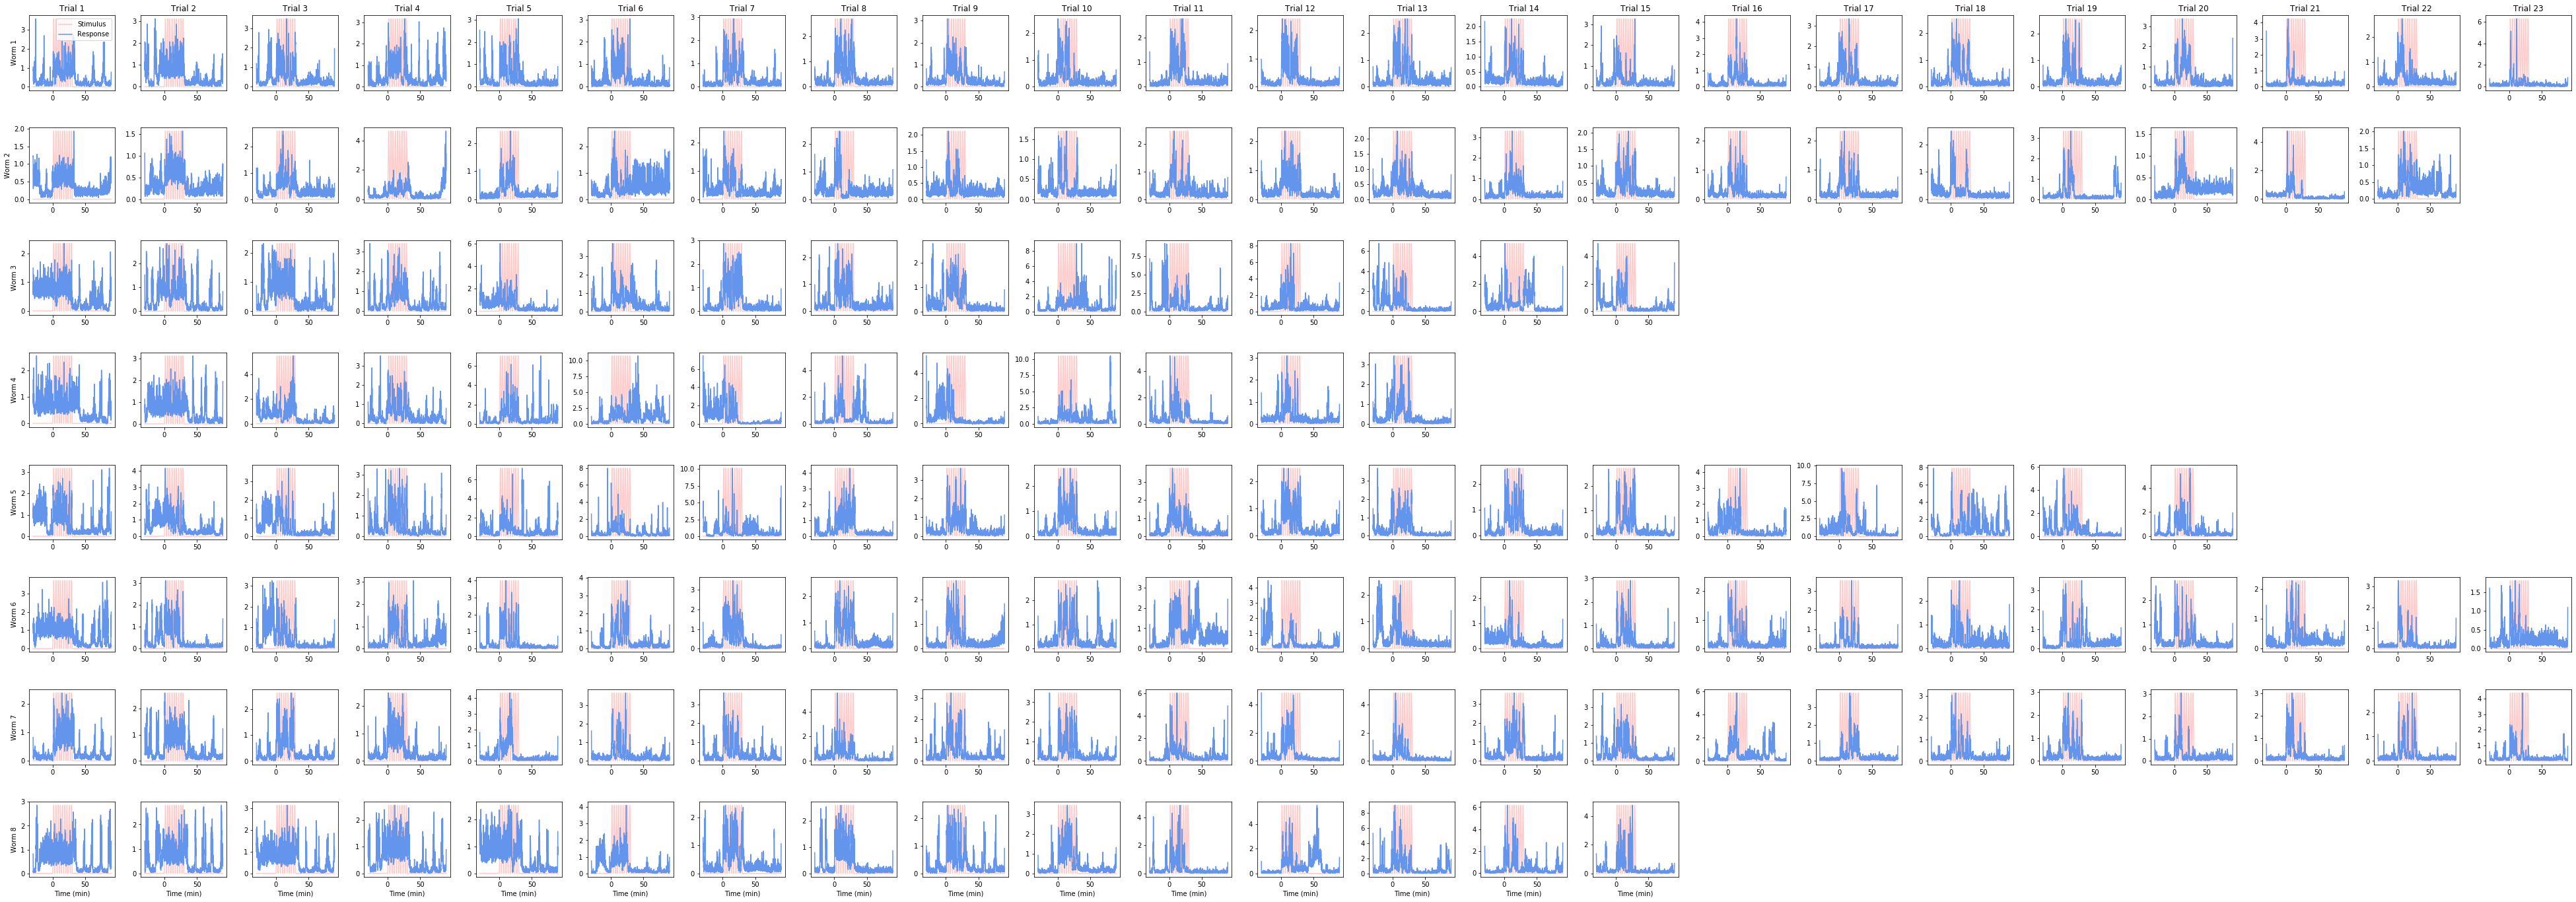

In [3]:
from analysis_functions.results_sin_indiv import plot_worm_trials

# Load the individual responses pickle file
with open('data/LDS_response_sinFunc_indiv.pickle', 'rb') as f:
    test_result = pickle.load(f)

# Call the function
plot_worm_trials('013024WT_30m_3.4mPeriod')

## Heatmap of aggregated experiments

This plots a heatmap of compiled experiments with the same conditions and the response(x-axis) by trial (y-axis)

Filtered Experiments:
081823WT_30m_4mPeriod
081123WT_30m_4mPeriod
072123WT_30m_4mPeriod
080123WT_30m_4mPeriod
052623WT_30m_4mPeriod
Trial 1: 23 worms
Trial 2: 21 worms
Trial 3: 20 worms
Trial 4: 15 worms
Trial 5: 11 worms
Trial 6: 11 worms
Trial 7: 11 worms
Trial 8: 10 worms
Trial 9: 10 worms
Trial 10: 10 worms
Trial 11: 10 worms
Trial 12: 4 worms
Trial 13: 1 worms
Time axis (minutes): [-30.00833333 -30.         -29.99166667 ...  89.96666667  89.975
  89.98333333]
Shape of trial averages: (13, 14400)


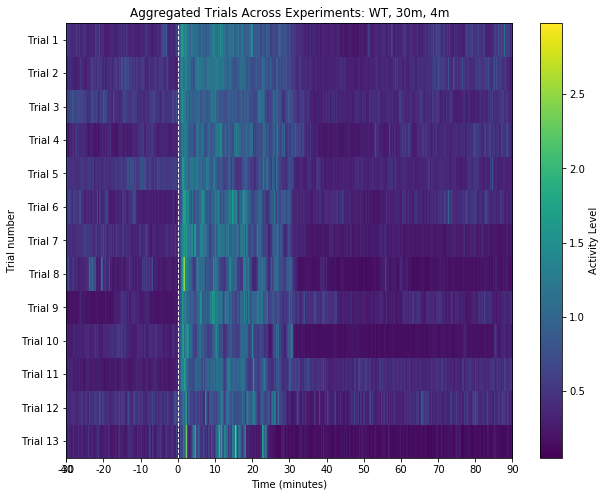

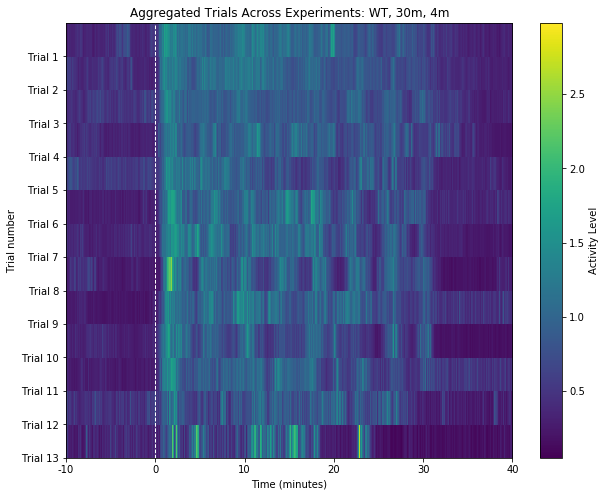

In [4]:
import pickle
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from analysis_functions.heatmap_indiv import *

# Load the pickle data
with open('data/LDS_response_sinFunc_indiv.pickle', 'rb') as f:
    test_result = pickle.load(f)

# Define filtering parameters
genotype = 'WT'
duration = '30m'
period_suffix = '4m'
exclude_dates = []

all_trial_averages, time_axis_minutes = aggregate_heatmap(test_result, genotype, duration, period_suffix, exclude_dates)

# To specify a narrower  time range for the heatmap
x_min = -10
x_max = 40
plot_adjustable_heatmap(all_trial_averages, time_axis_minutes, f"Aggregated Trials Across Experiments: {genotype}, {duration}, {period_suffix}", x_min, x_max)

## Traces of aggregated trials

This plots a sine wave trace of compiled experiment with the same condition and the response(x-axis) by trial (y-axis)